In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import sklearn
import numpy as np
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
import pickle

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
tf.__version__

'2.2.0'

In [4]:
df = pd.read_csv(r"C:\Users\thero\Desktop\auto-mpg.txt",na_values='?')

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

# Drop Car Name 

In [12]:
df.drop(['car name'],axis=1,inplace=True)

# Splitting in Train and Test

In [13]:
X=df.drop("mpg",axis=1)

In [14]:
Y=df['mpg']

In [15]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [16]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [19]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [22]:
X_train_std

array([[-0.24893345, -0.57765698, -0.02197412, ...,  0.11961844,
         0.54658592,  0.49337407],
       [ 1.52188861,  1.52787598,  1.06400983, ..., -0.55787761,
        -0.26938257, -0.74203461],
       [-0.83920747, -0.69302865, -0.17711468, ...,  0.51185299,
        -0.26938257,  1.72878276],
       ...,
       [ 0.34134057, -0.17385614,  0.15902321, ..., -1.05708522,
         1.36255441, -0.74203461],
       [ 1.52188861,  1.43173292,  1.45186124, ..., -2.6973388 ,
        -1.62933005, -0.74203461],
       [-0.83920747, -0.79878601, -0.74596341, ...,  0.44053762,
         1.36255441,  1.72878276]])

In [23]:
X_test_std

array([[ 1.52188861e+00,  2.00859127e+00,  1.83971265e+00,
         1.78911930e+00, -1.44931977e+00, -1.35734055e+00,
        -7.42034609e-01],
       [ 1.52188861e+00,  1.09523222e+00,  6.76158422e-01,
         1.04842530e+00, -5.86699954e-02,  8.18575415e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  3.83773597e-01,  1.59023209e-01,
         9.76305932e-02, -2.01300742e-01, -2.69382568e-01,
        -7.42034609e-01],
       [-8.39207472e-01, -1.01991504e+00, -8.75247218e-01,
        -1.20095793e+00,  4.40537616e-01,  2.74596424e-01,
         1.72878276e+00],
       [ 3.41340567e-01,  3.26087762e-01, -2.28828201e-01,
         9.83139770e-01,  1.22500672e+00, -2.69382568e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  5.66445406e-01, -6.68393133e-01,
         7.32680740e-01,  1.93816045e+00,  2.60692807e-03,
        -7.42034609e-01],
       [-8.39207472e-01, -1.14490101e+00, -9.01103979e-01,
        -1.59504513e+00,  8.68429855e-01, -1.35734055e+00,
         1.7287827

# saving SC transform

In [24]:
pickle.dump(sc, open(r'D:\Python37\Projects\Fuel Efficiency Prediction using ANN\scaler.pkl', 'wb'))

In [25]:
Y_train

274    20.3
157    15.0
173    24.0
357    32.9
263    17.7
       ... 
64     15.0
328    30.0
341    23.5
11     14.0
356    32.4
Name: mpg, Length: 313, dtype: float64

In [26]:
Y_test

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
       ... 
17     21.0
82     23.0
58     25.0
344    39.0
283    20.2
Name: mpg, Length: 79, dtype: float64

In [27]:
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [28]:
len(X_train.keys())

7

In [31]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 64,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the second hidden layer
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=1))
# Adding the output layer

# Compiling the ANN
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7345 - mean_absolute_error: 0.6054 - mean_squared_error: 0.7345
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5210 - mean_absolute_error: 0.4608 - mean_squared_error: 0.5210
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5632 - mean_absolute_error: 0.4970 - mean_squared_error: 0.5632
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4100 - mean_absolute_error: 0.4056 - mean_squared_error: 0.4100
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3869 - mean_absolute_error: 0.4258 - mean_squared_error: 0.3869
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3575 - mean_absolute_error: 0.4107 - mean_squared_error: 0.3575
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2463 - mean_absolute_error: 0.3053 - mean_squared_error: 0.2463
Epoch 8/1000
4/4 [================

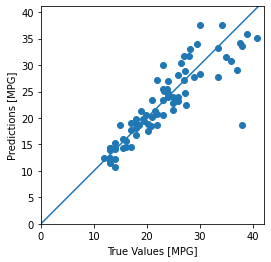

In [60]:
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [38]:
model.save(r"D:\Python37\Projects\Fuel Efficiency Prediction using ANN\model.h5")

In [41]:
X_test_std

array([[ 1.52188861e+00,  2.00859127e+00,  1.83971265e+00,
         1.78911930e+00, -1.44931977e+00, -1.35734055e+00,
        -7.42034609e-01],
       [ 1.52188861e+00,  1.09523222e+00,  6.76158422e-01,
         1.04842530e+00, -5.86699954e-02,  8.18575415e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  3.83773597e-01,  1.59023209e-01,
         9.76305932e-02, -2.01300742e-01, -2.69382568e-01,
        -7.42034609e-01],
       [-8.39207472e-01, -1.01991504e+00, -8.75247218e-01,
        -1.20095793e+00,  4.40537616e-01,  2.74596424e-01,
         1.72878276e+00],
       [ 3.41340567e-01,  3.26087762e-01, -2.28828201e-01,
         9.83139770e-01,  1.22500672e+00, -2.69382568e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  5.66445406e-01, -6.68393133e-01,
         7.32680740e-01,  1.93816045e+00,  2.60692807e-03,
        -7.42034609e-01],
       [-8.39207472e-01, -1.14490101e+00, -9.01103979e-01,
        -1.59504513e+00,  8.68429855e-01, -1.35734055e+00,
         1.7287827

In [42]:
prediction=model.predict(X_test_std)

In [43]:
prediction

array([[14.131476 ],
       [18.97427  ],
       [20.11533  ],
       [33.275238 ],
       [18.030518 ],
       [16.803568 ],
       [31.613104 ],
       [21.240788 ],
       [19.461668 ],
       [24.251759 ],
       [24.773273 ],
       [21.591639 ],
       [28.792582 ],
       [37.596573 ],
       [20.704586 ],
       [18.505625 ],
       [14.2841425],
       [23.137028 ],
       [12.1318445],
       [14.256332 ],
       [26.915407 ],
       [23.947676 ],
       [19.73273  ],
       [14.4797535],
       [34.04538  ],
       [29.117044 ],
       [18.821295 ],
       [12.167021 ],
       [20.584982 ],
       [15.278528 ],
       [33.581814 ],
       [35.19832  ],
       [33.089725 ],
       [27.7974   ],
       [31.7468   ],
       [24.638256 ],
       [22.436113 ],
       [16.039583 ],
       [12.177052 ],
       [30.450508 ],
       [31.665579 ],
       [25.517172 ],
       [15.609281 ],
       [11.5631   ],
       [12.429159 ],
       [27.260115 ],
       [27.82161  ],
       [14.26

In [44]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(Y_test,prediction))


RMSE:  3.6024852757925045
R_square: 0.7618848445277324


# Lets predict for a single car

In [47]:
list1=[[4,97,100,5000,14.5,70,3]]
list1=sc.transform(list1)
list1

array([[-0.83920747, -0.90454337, -0.0995444 ,  2.42535646, -0.37958917,
        -1.62933005,  1.72878276]])

In [48]:
prediction2=model.predict(list1)

In [49]:
prediction2

array([[28.2784]], dtype=float32)

In [50]:
list2=[[8,307,130,3504,12,70,1]]
list2=sc.transform(list2)
list2

array([[ 1.52188861,  1.11446083,  0.67615842,  0.64959007, -1.27103134,
        -1.62933005, -0.74203461]])

In [51]:
prediction3=model.predict(list2)
prediction3

array([[18.084133]], dtype=float32)